In [9]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors 
import sklearn
import itertools
from sklearn.cluster import KMeans
import time 


mat = scipy.io.loadmat('mnist-original.mat') # lecture du fichier\n",
data = np.transpose(mat['data'])
label = np.transpose(mat['label'])
X = [data[i].reshape(28,28) for i in range(len(data)) ] # on créé une nouvelle liste qui va contenir nos matrices 28x28"

X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2,random_state=22)
x_train = [np.reshape(X_train[i], (1,784)) for i in range(len(X_train))]
new_x_train = np.array([np.squeeze(x_train[i], axis=0) for i in range(len(x_train))])

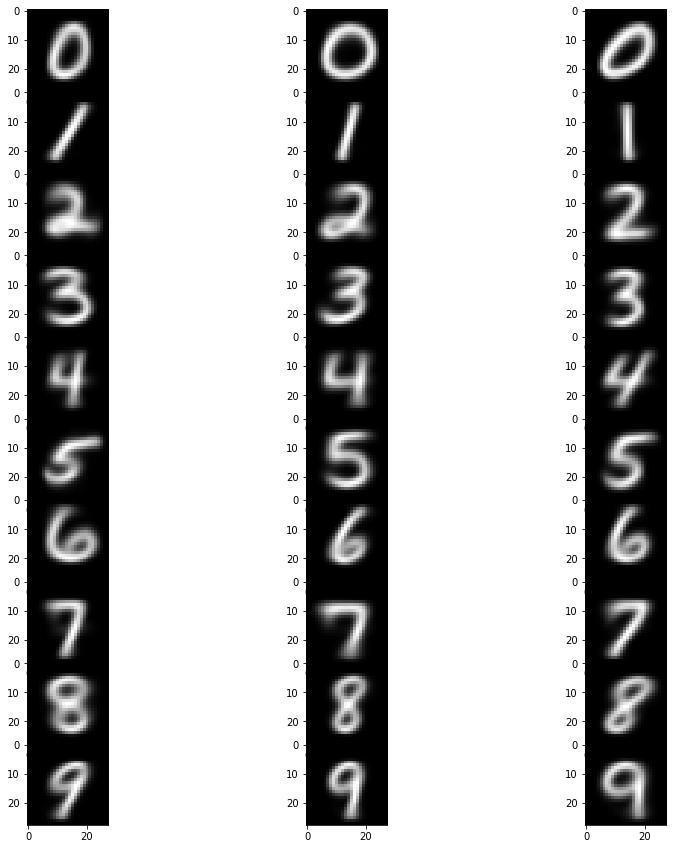

temps d'execution : 38.036908864974976secondes.


In [29]:
fig, ax = plt.subplots(10,3,figsize=(15,15))
start = time.time()
for k in range(10):
    idx = np.where((y_train == k))[0]
    Xk = np.array(new_x_train)[idx]    
    Ykk = np.array(y_train)[idx]
    Yk = np.reshape(Ykk, (len(Ykk),))
    kmeans = sklearn.cluster.KMeans(n_clusters=3).fit(Xk,Yk)
    centroidk = kmeans.cluster_centers_
    for i in range(3):
        ax[k, i].imshow(np.reshape(centroidk[i], (28,28)),cmap='gray')
        #ax[k, i].set_title(str(i))

fig.subplots_adjust(hspace=0.0, wspace=0.0)
plt.show()
end = time.time()
print("temps d'execution : "+str(end-start)+ "secondes.")